# Iris Flower Classification Project

In [1]:
# Importing necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Accessing to the dataset

df = pd.read_csv("A:/Project X/Data Science/Esoft/Semester 03/UNIT_24 - Advanced Programming For "
"Data Analytics/Assignments/Additional work/archive (6)/iris.csv")
df.head() # View top 5 rows

,Id,sepal_length,sepal_width,petal_length,petal_width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


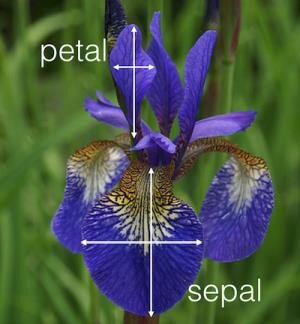

In [3]:
# Importing an image that describes the flower dimention

from IPython.display import Image, display

display(Image(filename = "A:/Project X/Data Science/Esoft/Semester 03/UNIT_24 - Advanced Programming For Data Analytics/Assignments/Additional work/archive (6)/Iris Flower.png"))

In [4]:
# Dropping the Id columns as it is not necessary for the model building

df = df.drop(columns = ['Id'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Just to get overall statistical understanding of the data
# This provides fundamental statistical overlook of the data

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Identifying data type of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# How many number of data belongs to each flower category

df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Preprocessing the Dataset

In [8]:
# Checking null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

### Categorical Values to Numerical Values

In this dataset data in the column Species has categorical data, so we use Label Encoder to conver it to numerical values

In [9]:
# Import necessary library

from sklearn.preprocessing import LabelEncoder

In [10]:
# Initialising

le = LabelEncoder()

In [11]:
df['Species'] = le.fit_transform(df['Species'])

In [12]:
# Access and print the mapping from species names to numbers

species_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapping of Species to Numbers:", species_mapping)

Mapping of Species to Numbers: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [14]:
# Seprate output/features and output/target variable

x = df.drop(columns='Species')
y = df['Species']

In [15]:
# Split data as train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20)

In [16]:
# Initialise the model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
# Train the model

model.fit(x_train, y_train)

LogisticRegression()

In [18]:
# Checking the performance

print("Accuracy of the model: ", model.score(x_test, y_test)*100)

Accuracy of the model:  100.0


In [19]:
model

LogisticRegression()

In [20]:
best_classifier = model

In [21]:
# Checking the model with actual data

def predict_iris(sepalLength, sepalWidth, petalLength, petalWidth):
    flower_features = np.array([[sepalLength, sepalWidth, petalLength, petalWidth]])
    prediction = model.predict(flower_features)
    flower_name = ""
    if (prediction == 0):
        flower_name = "Iris-setosa"
    elif (prediction == 1):
        flower_name = "Iris-versicolor"
    elif (prediction == 2):
        flower_name = "Iris-virginica"
    else: "Invalid Input"
    return flower_name

In [22]:
category = predict_iris(5.9, 3, 5.1, 1.8)
print(f'The predicted category of the iris is: {category}')

The predicted category of the iris is: Iris-virginica


### Save the Trained Model

In [23]:
# Saving the file

!pip install joblib
import joblib

In [24]:
joblib.dump(best_classifier, 'saved_trained_model.pkl')

['saved_trained_model.pkl']

### Save the Class Dictionary

In [25]:
species_mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [26]:
import json

# Converting "species_mapping" into numpy array

species_mapping = {key: int(value) for key, value in species_mapping.items()}

In [27]:
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(species_mapping))